# Evaluating a Machine learning model(score)

### Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator `score` method.
2. The `scoring` parameter.
3. Problem-specific metric functions

## 4.1 Evaluating a model with the `score` model

In [1]:
# Standard imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
heart_disease = pd.read_csv('~/sample_project/Data/heart-disease.csv')

In [3]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)



RandomForestClassifier()

In [45]:
clf.score(X_train, y_train)

1.0

In [46]:
clf.score(X_test, y_test)

0.8189300411522634

### The same but for regression...

In [47]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor


boston = load_boston()

boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])



np.random.seed(42)

# Create the data

X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Instatiate and fit model

model = RandomForestRegressor().fit(X_train, y_train)

# Make predictions

y_preds = model.predict(X_test)
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [48]:
model.score(X_test, y_test)

0.8654448653350507

## 4.2 Evaluating the model using the `scoring` parameter

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train);

In [50]:
clf.score(X_test, y_test)

0.831275720164609

In [51]:
np.random.seed(42)
cross_val_score(clf, X, y)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [52]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.83870968, 0.9       , 0.9       ,
       0.83333333, 0.73333333, 0.83333333, 0.73333333, 0.83333333])

In [53]:
np.random.seed(42)

# Single training and test split score.
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

# Compare the two.
clf_single_score, clf_cross_val_score

(0.831275720164609, 0.8248087431693989)

In [54]:
# Default scoring parameter of classifier = mean accuracy
clf.score();

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [55]:
# Scoring parameter set to None
np.random.seed(42)
cross_val_score(clf, X, y, scoring=None)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

### 4.2 Classification model evaluation metrics.

1. Accuracy.
2. Area under ROC curve. 
3. Confusion matrix
4. Classification report 


**Accuracy**

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']


clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)

In [57]:
np.mean(cross_val_score)

0.8248087431693989

In [58]:
print(f"Heart Disease Classifier Cross-Validated accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated accuracy: 82.48%


**Area under the Receiver Operating Characteristic curve (AUC/ROC)**

* Area under Curve (AUC)
* ROC curve 

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0

* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

In [60]:
from sklearn.metrics import roc_curve

# Fit the classifier

clf.fit(X_train, y_train)

# Make predictions with probabilities

y_probs = clf.predict_proba(X_test) 
y_probs[:10], len(y_probs)


(array([[0.28, 0.72],
        [0.34, 0.66],
        [0.38, 0.62],
        [0.59, 0.41],
        [0.4 , 0.6 ],
        [0.25, 0.75],
        [0.32, 0.68],
        [0.9 , 0.1 ],
        [0.09, 0.91],
        [0.31, 0.69]]),
 243)

In [61]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.72, 0.66, 0.62, 0.41, 0.6 , 0.75, 0.68, 0.1 , 0.91, 0.69])

In [62]:
# Calculate fpr, tpr, thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates

fpr

array([0.        , 0.        , 0.        , 0.        , 0.00884956,
       0.00884956, 0.00884956, 0.00884956, 0.00884956, 0.00884956,
       0.00884956, 0.01769912, 0.01769912, 0.02654867, 0.03539823,
       0.03539823, 0.04424779, 0.04424779, 0.04424779, 0.04424779,
       0.04424779, 0.04424779, 0.04424779, 0.0619469 , 0.07079646,
       0.07964602, 0.08849558, 0.09734513, 0.12389381, 0.12389381,
       0.12389381, 0.13274336, 0.14159292, 0.15929204, 0.18584071,
       0.19469027, 0.22123894, 0.23893805, 0.23893805, 0.25663717,
       0.26548673, 0.27433628, 0.2920354 , 0.2920354 , 0.30973451,
       0.33628319, 0.34513274, 0.3539823 , 0.37168142, 0.38938053,
       0.40707965, 0.43362832, 0.45132743, 0.46902655, 0.48672566,
       0.51327434, 0.52212389, 0.53982301, 0.55752212, 0.5840708 ,
       0.60176991, 0.61061947, 0.61946903, 0.65486726, 0.67256637,
       0.72566372, 0.75221239, 0.78761062, 0.82300885, 0.87610619,
       0.92920354, 0.96460177, 0.97345133, 1.        ])

**Create a function for plotting ROC curves**

TypeError: 'str' object is not callable

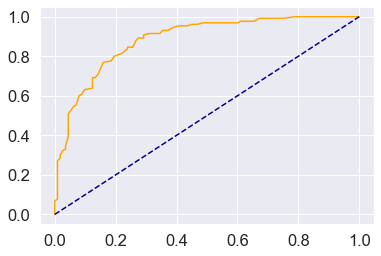

In [63]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate(fpr)
    and true positive rate(tpr) for a model.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    
    # Customise the plot
    
    plt.xlabel('Fale positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Receiver Operator Characteristic (ROC) curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [64]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8846153846153846

**Plot perfect ROC curve and AUC score**

TypeError: 'str' object is not callable

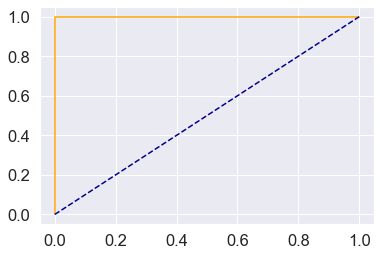

In [65]:
fpr, tpr, thresholds = roc_curve(y_test, y_test)

plot_roc_curve(fpr, tpr)

In [66]:
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts, and the actual labels it was supposed to predict.

In essence, given you an idea where the model is getting confused. 

In [9]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[ 80,  29],
       [ 12, 122]], dtype=int64)

**Visualise confusion matrix with pd.crosstab()**

In [10]:
pd.crosstab(y_test,
            y_preds,
            rownames=['Actual Labels'],
            colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,80,29
1,12,122


In [11]:
len(X_test)

243

**Make our confusion matrix more visual with Seaborn's heatmap()**

<AxesSubplot:>

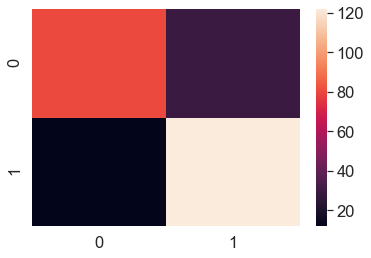

In [12]:
import seaborn as sns

# Set the font style

sns.set(font_scale=1.5)

# Create a confusion matrix

conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn 

sns.heatmap(conf_mat)

In [13]:
import sys
!conda install --yes --prefix C:\Users\gthom\sample_project\env seaborn

Solving environment: ...working... done

# All requested packages already installed.



<AxesSubplot:>

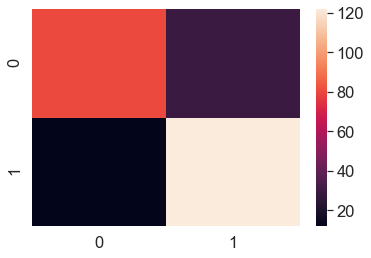

In [14]:
import seaborn as sns

# Set the font style

sns.set(font_scale=1.5)

# Create a confusion matrix

conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn 

sns.heatmap(conf_mat)

In [15]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using seaborns heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat, 
                     annot=True, # Annotate the conf_mat info
                     cbar=False,
                     fmt='g')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    

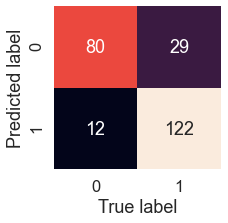

In [16]:
plot_conf_mat(conf_mat)

**Classification report**

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.73      0.80       109
           1       0.81      0.91      0.86       134

    accuracy                           0.83       243
   macro avg       0.84      0.82      0.83       243
weighted avg       0.84      0.83      0.83       243



### Where `precision` and `recall` become valuable.

In [18]:
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

c:\users\gthom\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\gthom\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\gthom\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000
